In [58]:
import pandas as pd
import numpy as np
from astropy.io import fits, ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join
import math

In [2]:
path = 'C:\\Users\\gamak\\Documents\\Papers\\Stars\\'
fits_file = path + 'all_columns_catalog.fits.gz'
hdul = fits.open(fits_file)
tab = hdul[1].data

In [3]:
i = tab['l1'] <= 180
bins = Table(tab[i])

In [28]:
tab.columns

ColDefs(
    name = 'solution_id1'; format = 'K'
    name = 'solution_id2'; format = 'K'
    name = 'source_id1'; format = 'K'
    name = 'source_id2'; format = 'K'
    name = 'random_index1'; format = 'K'
    name = 'random_index2'; format = 'K'
    name = 'ref_epoch1'; format = 'D'; unit = 'yr'
    name = 'ref_epoch2'; format = 'D'; unit = 'yr'
    name = 'ra1'; format = 'D'; unit = 'deg'
    name = 'ra2'; format = 'D'; unit = 'deg'
    name = 'ra_error1'; format = 'E'; unit = 'mas'
    name = 'ra_error2'; format = 'E'; unit = 'mas'
    name = 'dec1'; format = 'D'; unit = 'deg'
    name = 'dec2'; format = 'D'; unit = 'deg'
    name = 'dec_error1'; format = 'E'; unit = 'mas'
    name = 'dec_error2'; format = 'E'; unit = 'mas'
    name = 'parallax1'; format = 'D'; unit = 'mas'
    name = 'parallax2'; format = 'D'; unit = 'mas'
    name = 'parallax_error1'; format = 'E'; unit = 'mas'
    name = 'parallax_error2'; format = 'E'; unit = 'mas'
    name = 'parallax_over_error1'; format = 'E'

In [4]:
tab1 = pd.read_csv(path+'gaia_xstars_pm_r98_200pc_lkh10_woutdup.gzip')
xr = Table.from_pandas(tab1)

In [5]:
bins.rename_column('source_id1','source_id')
xr_bin = join(xr,bins,keys='source_id')
bins.rename_column('source_id','source_id1')

In [6]:
bins.rename_column('source_id2','source_id')
xr_bin2 = join(xr,bins,keys='source_id')
bins.rename_column('source_id','source_id2')

In [33]:
xr_bin.colnames

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

In [63]:
col = ['hpidx','source_id','ra1','dec1','ra2','dec2','pairdistance',
 'sep_AU',
 'binary_type',
 'Sigma18',
 'R_chance_align',
 'ML_FLUX_0','MG','bp_rp','bp_rp1','bp_rp2',
 'Fbol',
 'Log(Fx/Fo)',
 'Lx',
 'Lbol',
 'Teff',
 'dist_pc','parallax1',
 'parallax2','phot_g_mean_mag2']

In [64]:
t1 = xr_bin[col].to_pandas()
t2 = xr_bin2[col].to_pandas()

In [65]:
t = t1.append(t2,ignore_index=True)

In [66]:
k = 3.085668*10**18
pi=math.pi
flux = 362.3 * 4548*10**(-11)
phot_col = ['phot_bp_mean_mag2','phot_rp_mean_mag2','phot_g_mean_mag2']
dop_tab = pd.DataFrame(index=t.index, columns = ['MG2','Fbol2','Log(Fx/Fo)2','Lbol2','Teff2'], dtype='float64')

In [67]:
for i in range(t.shape[0]):
    dop_tab['MG2'].iloc[i] = t[phot_col[2]].iloc[i]+5+5*(math.log10(t['parallax2'].iloc[i])-3)
    dop_tab['Fbol2'].iloc[i] = 10**(-t[phot_col[2]].iloc[i]/2.5)*flux
    #dop_tab['bp_rp'].iloc[i] = tab_fin[phot_col[0]].iloc[i] - tab_fin[phot_col[1]].iloc[i]
    dop_tab['Log(Fx/Fo)2'].iloc[i] = math.log10(t['ML_FLUX_0'].iloc[i]/dop_tab['Fbol2'].iloc[i])
    dop_tab['Lbol2'].iloc[i] = 4*pi*dop_tab['Fbol2'].iloc[i]*(1000*k/t['parallax2'].iloc[i])**2
    BR = t['bp_rp2'].iloc[i]
    dop_tab['Teff2'].iloc[i] = 7928. - 3663.*BR + 803.*BR**2 - 9.*BR**3 + 325.*4.5 - 500.*4.5*BR + 278.*4.5*BR**2-53.5*4.5*BR**3

In [68]:
t = pd.concat([t,dop_tab],axis = 1)

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

In [69]:
t = t.sort_values('ML_FLUX_0', ascending=False)

In [73]:
t.to_pickle(path+'GAIA_binaries.pkl')

In [17]:
x = t.bp_rp # choose column X from table
y = t.MG # choose column Y from table

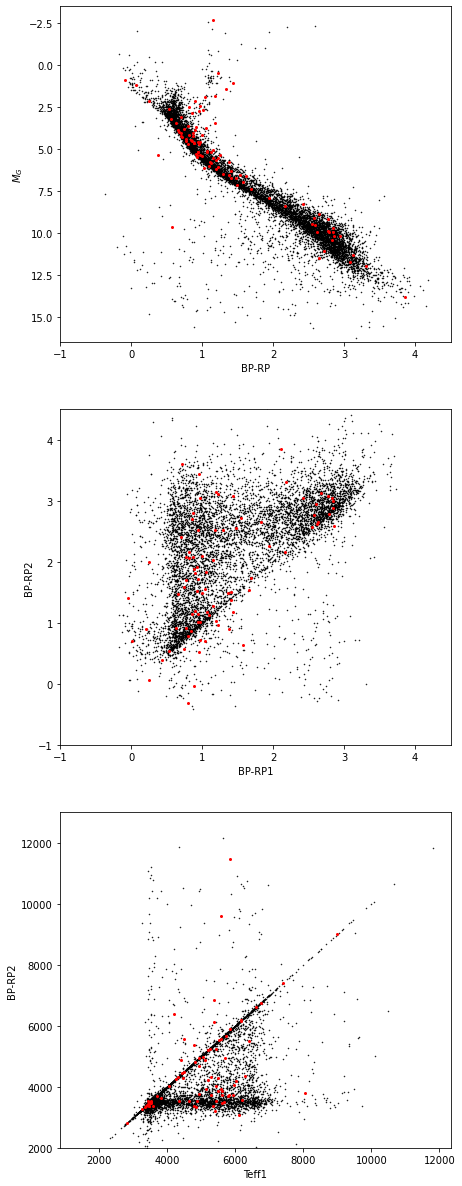

In [72]:
fig, axs = plt.subplots(ncols=1, nrows=3, sharey=False, figsize=(7, 21))

ax=axs[0]
ax.plot(x,y,'ko',markersize=.5)
ax.plot(x.iloc[:100],y.iloc[:100],'ro',markersize = 2)
ax.set(xlim=(-1,4.5),ylim=(16.5,-3.5), xlabel = 'BP-RP',ylabel = '$M_G$')

ax=axs[1]

ax.plot(t.bp_rp1,t.bp_rp2,'ko',markersize=.5)
ax.plot(t['bp_rp1'].iloc[:100],t['bp_rp2'].iloc[:100],'ro',markersize=2)
ax.set(xlim=(-1,4.5),ylim=(-1,4.5), xlabel = 'BP-RP1',ylabel = 'BP-RP2')

ax=axs[2]

ax.plot(t.Teff,t.Teff2,'ko',markersize=.5)
ax.plot(t['Teff'].iloc[:100],t['Teff2'].iloc[:100],'ro',markersize=2)
ax.set(ylim=(2000,13000), xlabel = 'Teff1',ylabel = 'BP-RP2')

plt.savefig(path+'XR_GAIA_binaries_HRD.jpeg', dpi=300)

In [50]:
t.binary_type.unique()

array(['MSMS', 'WDMS', 'MS??', 'WDWD', 'WD??'], dtype=object)